## Ultimate Challenge

### Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

#### Data description

●city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

#### Data Wrangling

In [103]:
import pandas as pd
import json
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [6]:
d=open('ultimate_data_challenge.json','r')
data=pd.DataFrame(json.load(d))
d.close()
data.head(8)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0


In [7]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


As per the data provided it seems that driver tends to rate the ride more than opposite. First lets check for any null value present in the data , and if it is there then we have to check if it can be removed or any other treatment for the same is required

In [9]:
data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

So the missing values are preset in the data and there are about 8122 missing values for rating of driver and 396 for the phone and 201 for the rating by driver. As we ave dataset of 50,000 we can replace these missing values for rating of driver  and rating by drover. Also for teh missing value for the phone we can replace the missing data with the term unavailable.

In [10]:
#First filling the missing phone values with Unavailable.
data['phone'].fillna('Unavailable', inplace=True)

In [11]:
data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [14]:
#now averaging teh missing ratings by using the mean of the data
data[data.avg_rating_of_driver.isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


In [15]:
data.mean()

trips_in_first_30_days     2.278200
avg_rating_of_driver       4.601559
avg_surge                  1.074764
surge_pct                  8.849536
ultimate_black_user        0.377080
weekday_pct               60.926084
avg_dist                   5.796827
avg_rating_by_driver       4.778158
dtype: float64

In [16]:
d=data.fillna(data.mean())

In [18]:
d.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [22]:
d.head(8)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.500000,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.000000,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0


In [23]:
d.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

To find the number of retained users first we will have to check when was the last_trip made and see if the users had a history of more than 30 day then he/she is retained.

In [24]:
d[['last_trip_date','signup_date']].describe()


,last_trip_date,signup_date
count,50000,50000
unique,182,31
top,2014-06-29,2014-01-18
freq,2036,2948


As per the above table last date of the data is 2014-01-07 and the last signuo was in 2014-01-10. This means that the signups stopped in January. Thus all user in the month of June (excluding June 1st) were the retained users.

Since we are interested in having a high retention rate, lets add a binary column into the dataframe indicating weather a user was retained or not.

In [25]:
## Taking retained users as the one who are still present and working after 1st June
from datetime import datetime as dt
datetime_june1st = dt.strptime('June 1 2014', '%B %d %Y')
d['last_trip_date'] = pd.to_datetime(d['last_trip_date'])

d['retained'] = (d['last_trip_date'] >= datetime_june1st)


In [27]:
d.head(8)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
5,Winterfell,2,2014-01-09,3.500000,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,True
6,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,False
7,Winterfell,2,2014-01-28,5.000000,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,False


In [28]:
d['retained'].value_counts()

False    31196
True     18804
Name: retained, dtype: int64

In [29]:
len(d[d['retained'] == True])/(len(d['retained']))

0.37608

Thus 37.61% users were retained

In [34]:
#taking only retained data
ret_d =d[d['retained'] == True]

In [33]:
ret_d.head(8)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,True
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0,True
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0,True
17,King's Landing,0,2014-01-12,3.9,1.00,2014-07-01,iPhone,0.0,True,95.2,2.38,4.8,True
18,King's Landing,6,2014-01-28,4.6,1.21,2014-06-24,iPhone,30.8,True,80.8,6.83,4.8,True
19,King's Landing,0,2014-01-02,5.0,1.17,2014-06-03,iPhone,33.3,False,66.7,12.08,5.0,True


In [36]:
ret_d.shape

(18804, 13)

In [38]:
avg_rating_by_driver_retained = ret_d['avg_rating_by_driver'].mean()
avg_rating_by_driver_retained

4.762801196290921

In [39]:
nret_d =d[d['retained'] == False]

In [40]:
avg_rating_by_driver_notretained = nret_d['avg_rating_by_driver'].mean()
avg_rating_by_driver_notretained

4.787414928270617

Thus this shows that the ratings of users given by driver retained and not retained doesnot have major difference.

#### Data Visualization

In [ ]:
#checking the data by city

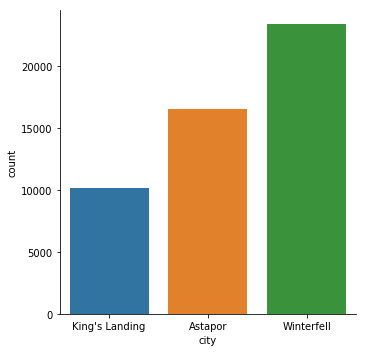

In [43]:
sns.catplot(x='city', kind='count', data=d)
plt.show()


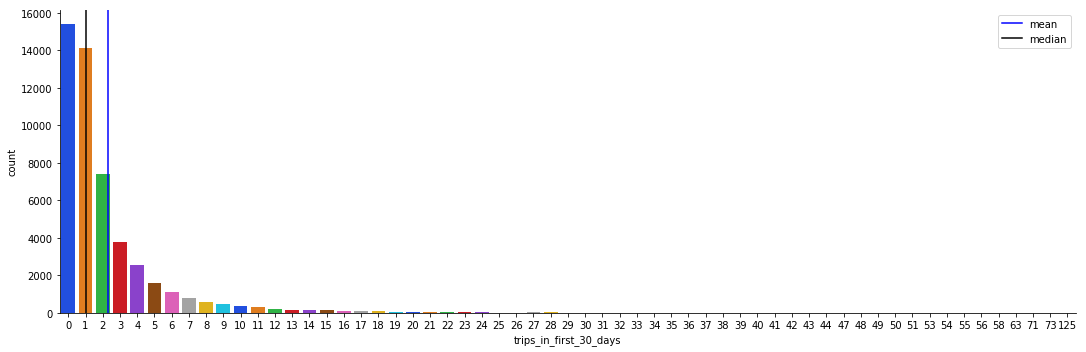

In [45]:
#Checking the trips in first 30 days to verify if the users only traveled in the starting for some kind of ofers
sns.catplot(x='trips_in_first_30_days', kind='count', aspect=3, palette='bright', data=d)
plt.axvline(np.mean(d.trips_in_first_30_days), color='blue', label='mean')
plt.axvline(np.median(d.trips_in_first_30_days), color='black', label='median')
plt.legend()
plt.show()


#The above graph had shown that majority of the users have taken less than 15 rides in their first 30 days. That means abot 1 trip in 2 days in a week. Sme have also taken more than 25 trips. Removing the data of people who took more than 25 trips.

In [46]:
d1=d[d.trips_in_first_30_days <26]

In [48]:
d1=d1.reset_index(drop=True)

In [49]:
d1

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49808,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,True
49809,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,False
49810,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,False
49811,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,False


#Now lets target the priority users ,i.e. the users who are ultimate black user.

This shows that users that some of the ultimate black users are retained. 
We will plot bar graph to verify the number of black user who are retained and not retained.

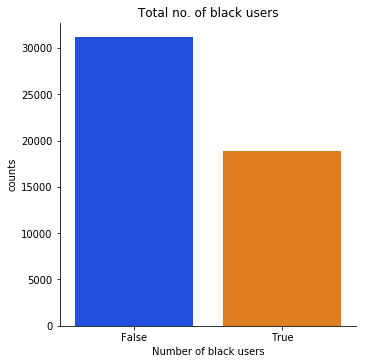

In [129]:
#bar chart for the full data to check how many are the black user
sns.catplot(x='ultimate_black_user', kind='count', palette='bright', data=d )
plt.title('Total no. of black users')
plt.xlabel('Number of black users')
plt.ylabel('counts')
plt.show()


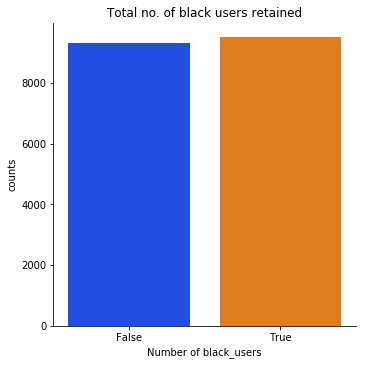

In [130]:
#bar chart showing the number of retained black users
sns.catplot(x='ultimate_black_user', kind='count', palette='bright', data=ret_d )
plt.title('Total no. of black users retained')
plt.xlabel('Number of black_users')
plt.ylabel('counts')
plt.show()


##### Same way we can check by the city

In [ ]:
sns.catplot(x='city', kind='count', palette='bright', data=d )
plt.title('Total no. of users per city ')
plt.xlabel('city')
plt.ylabel('counts')
plt.show()

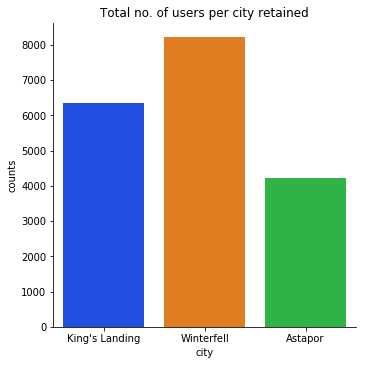

In [132]:

sns.catplot(x='city', kind='count', palette='bright', data=ret_d )
plt.title('Total no. of users per city retained')
plt.xlabel('city')
plt.ylabel('counts')
plt.show()


### Machine Learning

In [167]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

This is a binary classification problem. Our data is highly imbalanced so we are going to use logistic regression, random forests and SVM.

In [149]:
#We will have to convert the city and phone columns to numeric columns to use for ML.
d2= d.drop('last_trip_date', axis=1)
d2


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.700000,1.10,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.000000,1.00,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.300000,1.00,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.600000,1.14,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.400000,1.19,Android,11.8,False,82.4,3.13,4.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,iPhone,0.0,False,100.0,5.63,4.2,True
49996,Astapor,1,2014-01-24,4.601559,1.00,iPhone,0.0,False,0.0,0.00,4.0,False
49997,Winterfell,0,2014-01-31,5.000000,1.00,Android,0.0,True,100.0,3.86,5.0,False
49998,Astapor,2,2014-01-14,3.000000,1.00,iPhone,0.0,False,100.0,4.58,3.5,False


In [150]:
d2['signup_date'] = pd.to_datetime(df_no_last_trip_date['signup_date'])
d2['signup_day'] = pd.DatetimeIndex(df_no_last_trip_date['signup_date']).day
d2

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,signup_day
0,King's Landing,4,2014-01-25,4.700000,1.10,iPhone,15.4,True,46.2,3.67,5.0,True,25
1,Astapor,0,2014-01-29,5.000000,1.00,Android,0.0,False,50.0,8.26,5.0,False,29
2,Astapor,3,2014-01-06,4.300000,1.00,iPhone,0.0,False,100.0,0.77,5.0,False,6
3,King's Landing,9,2014-01-10,4.600000,1.14,iPhone,20.0,True,80.0,2.36,4.9,True,10
4,Winterfell,14,2014-01-27,4.400000,1.19,Android,11.8,False,82.4,3.13,4.9,False,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,iPhone,0.0,False,100.0,5.63,4.2,True,25
49996,Astapor,1,2014-01-24,4.601559,1.00,iPhone,0.0,False,0.0,0.00,4.0,False,24
49997,Winterfell,0,2014-01-31,5.000000,1.00,Android,0.0,True,100.0,3.86,5.0,False,31
49998,Astapor,2,2014-01-14,3.000000,1.00,iPhone,0.0,False,100.0,4.58,3.5,False,14


In [151]:
d2['ultimate_black_user'] = d2['ultimate_black_user'].astype(int)
d2['retained'] = d2['retained'].astype(int)
d3 = df_no_last_trip_date.drop('signup_date', axis=1)
d3

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,signup_day
0,King's Landing,4,4.700000,1.10,iPhone,15.4,True,46.2,3.67,5.0,True,25
1,Astapor,0,5.000000,1.00,Android,0.0,False,50.0,8.26,5.0,False,29
2,Astapor,3,4.300000,1.00,iPhone,0.0,False,100.0,0.77,5.0,False,6
3,King's Landing,9,4.600000,1.14,iPhone,20.0,True,80.0,2.36,4.9,True,10
4,Winterfell,14,4.400000,1.19,Android,11.8,False,82.4,3.13,4.9,False,27
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.000000,1.00,iPhone,0.0,False,100.0,5.63,4.2,True,25
49996,Astapor,1,4.601559,1.00,iPhone,0.0,False,0.0,0.00,4.0,False,24
49997,Winterfell,0,5.000000,1.00,Android,0.0,True,100.0,3.86,5.0,False,31
49998,Astapor,2,3.000000,1.00,iPhone,0.0,False,100.0,4.58,3.5,False,14


In [153]:
X = d3.drop('retained', axis=1)
y = d3['retained']

In [154]:
X

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_day
0,King's Landing,4,4.700000,1.10,iPhone,15.4,True,46.2,3.67,5.0,25
1,Astapor,0,5.000000,1.00,Android,0.0,False,50.0,8.26,5.0,29
2,Astapor,3,4.300000,1.00,iPhone,0.0,False,100.0,0.77,5.0,6
3,King's Landing,9,4.600000,1.14,iPhone,20.0,True,80.0,2.36,4.9,10
4,Winterfell,14,4.400000,1.19,Android,11.8,False,82.4,3.13,4.9,27
...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.000000,1.00,iPhone,0.0,False,100.0,5.63,4.2,25
49996,Astapor,1,4.601559,1.00,iPhone,0.0,False,0.0,0.00,4.0,24
49997,Winterfell,0,5.000000,1.00,Android,0.0,True,100.0,3.86,5.0,31
49998,Astapor,2,3.000000,1.00,iPhone,0.0,False,100.0,4.58,3.5,14


In [155]:
y

0         True
1        False
2        False
3         True
4        False
         ...  
49995     True
49996    False
49997    False
49998    False
49999    False
Name: retained, Length: 50000, dtype: bool

In [184]:
X_dummies = pd.get_dummies(X, drop_first=True)
X_dummies.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'signup_day', 'city_King's Landing',
       'city_Winterfell', 'phone_Unavailable', 'phone_iPhone'],
      dtype='object')

In [158]:
#Setting up testing and training sets
X_train, X_test, y_train, y_test= train_test_split(X_dummies, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(35000, 13) (35000,)
(15000, 13) (15000,)


#### Trying logistic Regression

In [159]:
logreg=LogisticRegression()

In [160]:
logreg.fit(X_train, y_train)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
y_pred = logreg.predict(X_test)

In [164]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7932 1447]
 [2797 2824]]
              precision    recall  f1-score   support

       False       0.74      0.85      0.79      9379
        True       0.66      0.50      0.57      5621

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000



In [192]:
### Not able to run because of the phone_unavailable column
#from sklearn.model_selection import cross_val_score
#cv_results = cross_val_score(logreg,X,y,cv=5)
#cv_results

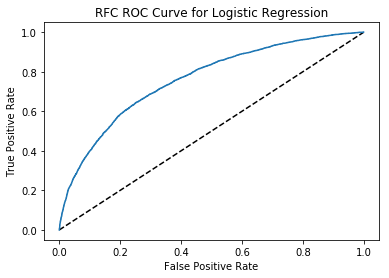

In [169]:
log_pre_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr , thresholds = roc_curve(y_test, log_pre_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC Curve for Logistic Regression')
plt.show()

#### Trying Random Forest

In [171]:
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [172]:
rfc_pre= rfc.predict(X_test)

In [175]:
print(confusion_matrix(y_test, rfc_pre))
print(classification_report(y_test, rfc_pre))

[[7942 1437]
 [2308 3313]]
              precision    recall  f1-score   support

       False       0.77      0.85      0.81      9379
        True       0.70      0.59      0.64      5621

    accuracy                           0.75     15000
   macro avg       0.74      0.72      0.72     15000
weighted avg       0.75      0.75      0.75     15000



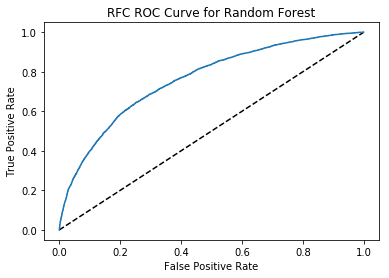

In [177]:
rfc_pre_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr , thresholds = roc_curve(y_test, rfc_pre_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC Curve for Random Forest')
plt.show()

#### Trying Decision Tree

In [194]:
decision_tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)

In [195]:
accuracy_score(y_test, decision_tree_pred)

0.6993333333333334

In [197]:
print(confusion_matrix(y_test, decision_tree_pred))
print(classification_report(y_test, decision_tree_pred))

[[7069 2310]
 [2200 3421]]
              precision    recall  f1-score   support

       False       0.76      0.75      0.76      9379
        True       0.60      0.61      0.60      5621

    accuracy                           0.70     15000
   macro avg       0.68      0.68      0.68     15000
weighted avg       0.70      0.70      0.70     15000



In [203]:
feat_imp_rfc = pd.DataFrame({'Importance':rfc.feature_importances_})    
feat_imp_rfc['Feature'] = X_dummies.columns
feat_imp_rfc.sort_values(by='Importance', ascending=True, inplace=True)
feat_imp_rfc = feat_imp_rfc.iloc[:14]

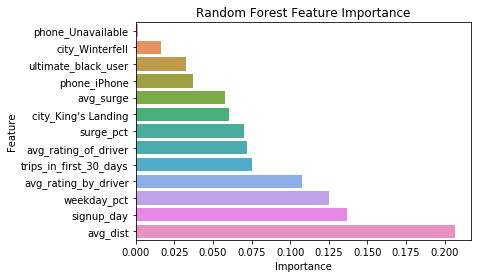

In [211]:

sns.barplot(y="Feature", x="Importance", data=feat_imp_rfc)
plt.title('Random Forest Feature Importance')
plt.show()


As per the RFC model avg_dist is the most important feature for classificiation 

### Summary and Suggestions


Based on the performance of classifiers following recommendations are suggested for Ultimate:
1. Try to improve the driver participation and conduct some trainings for drivers so that the ratings of drivers are imporved, as riders of low rating were not retained.
2. Try to reduce the surge amount or provide points to the customers so that the users are motivated to use the service in the peak hours.
3. Users who are looking for longer trips or have a past history of longer trips should be focussed on mainly.